# Chi2 test on cathegorical data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

## Loading data

In [14]:
path_file = 'propuesta_cluster.csv'
data = pd.read_csv(path_file)
data.head()

,client_id,loan_id,state,arrears_days,total_paid,Monto Acumulado,Uso de los recursos,Plazo,Sector,Ingresos,...,LinkedIn empresarios,Edad empresarios,Activador,Número de accionistas,Impacto,Acceso previso a la banca,# Empleados,Mujeres empresarias,Mujeres en cargos directivos,cluster
0,241,1076,LATE,17,147915805,250000000,CR,25 a 36 meses,Servicios,Seed,...,Si,45,Internet,2,No,Si,16,No,2,1
1,241,1244,LATE,23,91852726,250000000,CR,25 a 36 meses,Servicios,Seed,...,Si,45,Internet,2,No,Si,16,No,2,1
2,362,1469,PAID,14,15211138,50000000,KT - EX,13 a 24 meses,Servicios,Seed,...,No,32,SocialNetworks,3,No,Si,3,No,0,0
3,428,119,LATE,64,8713879,40000000,SP,13 a 24 meses,Industria,Seed,...,Si,44,CreditProfessionalContact,2,No,Si,5,No,0,0
4,428,120,LATE,64,8102608,40000000,SP,13 a 24 meses,Industria,Seed,...,Si,44,CreditProfessionalContact,2,No,Si,5,No,0,0


In [15]:
data.columns

Index(['client_id', 'loan_id', 'state', 'arrears_days', 'total_paid',
       'Monto Acumulado', 'Uso de los recursos', 'Plazo', 'Sector', 'Ingresos',
       'Ubicación', 'Estrato Mínimo', 'Procesos judiciales', 'Alertas',
       'Score Bureau Empresa', 'Huellas de Consulta', 'Website empresa',
       'Instagram empresa', 'LinkedIn empresa', 'LinkedIn empresarios',
       'Edad empresarios', 'Activador', 'Número de accionistas', 'Impacto',
       'Acceso previso a la banca', '# Empleados', 'Mujeres empresarias',
       'Mujeres en cargos directivos', 'cluster'],
      dtype='object')

In [16]:
drop_columns = ['arrears_days', 'total_paid', 'Monto Acumulado',
                'Score Bureau Empresa',
                'Huellas de Consulta', 'Edad empresarios', 'Número de accionistas',
                '# Empleados', 'Mujeres en cargos directivos', 'cluster', 'client_id', 'loan_id']
data = data.drop(columns=drop_columns)
data.head()

,state,Uso de los recursos,Plazo,Sector,Ingresos,Ubicación,Estrato Mínimo,Procesos judiciales,Alertas,Website empresa,Instagram empresa,LinkedIn empresa,LinkedIn empresarios,Activador,Impacto,Acceso previso a la banca,Mujeres empresarias
0,LATE,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No,No,Si,Si,Si,Si,Internet,No,Si,No
1,LATE,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No,No,Si,Si,Si,Si,Internet,No,Si,No
2,PAID,KT - EX,13 a 24 meses,Servicios,Seed,Medellín,3,No,No,Si,No,Si,No,SocialNetworks,No,Si,No
3,LATE,SP,13 a 24 meses,Industria,Seed,Medellín,4,No,No,Si,No,Si,Si,CreditProfessionalContact,No,Si,No
4,LATE,SP,13 a 24 meses,Industria,Seed,Medellín,4,No,No,Si,No,Si,Si,CreditProfessionalContact,No,Si,No


In [17]:
data_dum = pd.get_dummies(data, drop_first=True)

In [8]:
data_dum.head(10)

,client_id,loan_id,Estrato Mínimo,state_PAID,Uso de los recursos_KT - CO,Uso de los recursos_KT - EX,Uso de los recursos_SP,Plazo_25 a 36 meses,Plazo_Menos de 12 meses,Plazo_Más de 37 meses,...,Activador_FriendOrColleague,Activador_Internet,Activador_Newspapers,Activador_Other,Activador_Referrer,Activador_RutaN,Activador_SocialNetworks,Impacto_Si,Acceso previso a la banca_Si,Mujeres empresarias_Si
0,241,1076,5,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,241,1244,5,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,362,1469,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,428,119,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,428,120,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,429,998,4,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,429,1512,4,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,430,205,5,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
8,430,587,5,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
9,430,1092,5,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
print(data_dum.shape)
print("The data set contains: {} rows and {} columns".format(data.shape[0], data.shape[1]))
print("Features after get_dummies:\n", list(data_dum.columns))

(577, 51)
The data set contains: 577 rows and 17 columns
Features after get_dummies:
 ['Estrato Mínimo', 'state_PAID', 'Uso de los recursos_KT - CO', 'Uso de los recursos_KT - EX', 'Uso de los recursos_SP', 'Plazo_25 a 36 meses', 'Plazo_Menos de 12 meses', 'Plazo_Más de 37 meses', 'Sector_Industria', 'Sector_Servicios', 'Ingresos_Scale Up', 'Ingresos_Seed', 'Ingresos_Venture', 'Ubicación_Barranquilla', 'Ubicación_Bello', 'Ubicación_Bogotá D.C.', 'Ubicación_Bucaramanga', 'Ubicación_Cali', 'Ubicación_Cartagena de indias', 'Ubicación_Copacabana', 'Ubicación_Envigado', 'Ubicación_Itagüí', 'Ubicación_La Ceja', 'Ubicación_La Estrella', 'Ubicación_Manizales', 'Ubicación_Marinilla', 'Ubicación_Medellín', 'Ubicación_Neiva', 'Ubicación_Pereira', 'Ubicación_Rionegro', 'Ubicación_Sabaneta', 'Ubicación_Santa Marta', 'Procesos judiciales_Si', 'Alertas_Si', 'Website empresa_Si', 'Instagram empresa_Si', 'LinkedIn empresa_Si', 'LinkedIn empresarios_Si', 'Activador_CreditProfessionalContact', 'Activador

In [19]:
X = data_dum.drop('state_PAID', axis=1) # input categorical features
y = data_dum['state_PAID'] # target variable

In [20]:
# categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)
# print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 Estrato Mínimo: 0.687684
 Uso de los recursos_KT - CO: 6.213637
 Uso de los recursos_KT - EX: 2.017533
 Uso de los recursos_SP: 0.736367
 Plazo_25 a 36 meses: 1.038302
 Plazo_Menos de 12 meses: 0.006941
 Plazo_Más de 37 meses: 7.648936
 Sector_Industria: 14.680969
 Sector_Servicios: 2.898512
 Ingresos_Scale Up: 0.071530
 Ingresos_Seed: 2.697520
 Ingresos_Venture: 0.343865
 Ubicación_Barranquilla: 0.340176
 Ubicación_Bello: 0.969283
 Ubicación_Bogotá D.C.: 1.591121
 Ubicación_Bucaramanga: 0.730696
 Ubicación_Cali: 5.666384
 Ubicación_Cartagena de indias: 0.000487
 Ubicación_Copacabana: 1.031690
 Ubicación_Envigado: 0.340176
 Ubicación_Itagüí: 17.792635
 Ubicación_La Ceja: 1.031690
 Ubicación_La Estrella: 19.839448
 Ubicación_Manizales: 0.938810
 Ubicación_Marinilla: 0.969283
 Ubicación_Medellín: 2.459646
 Ubicación_Neiva: 0.969283
 Ubicación_Pereira: 0.302941
 Ubicación_Rionegro: 0.365348
 Ubicación_Sabaneta: 0.002920
 Ubicación_Santa Marta: 1.031690
 Procesos judiciales_Si: 0.027460
 

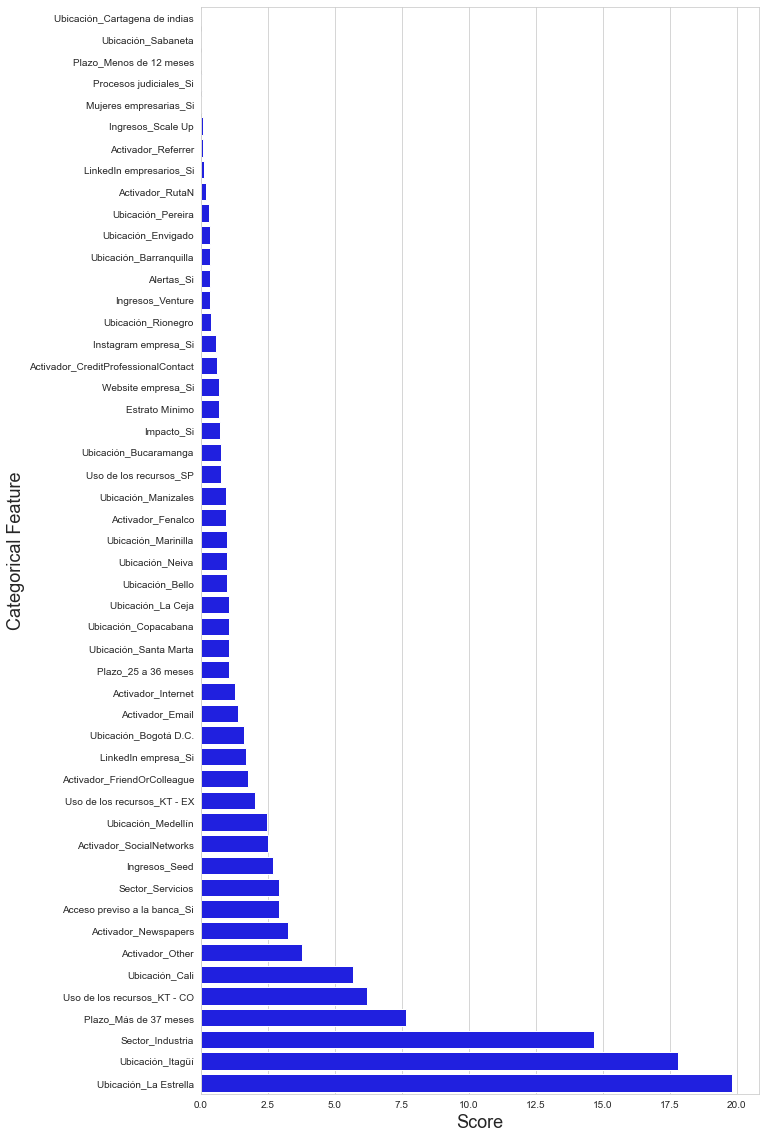

In [21]:
# plot the scores
plt.figure(figsize=(10,20))
datset = pd.DataFrame()
datset['feature'] = X.columns[ range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=True)
sns.barplot(datset['scores'], datset['feature'], color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [ ]:
## scikit-learn OrdinalEncoder() / LabelEncoder()

In [22]:
X1 = data.drop('state', axis=1) # input features
y1 = data['state'] # target variable

In [25]:
# prepare input features
oe = OrdinalEncoder()
oe.fit(X1)
X_enc = oe.transform(X1)

# prepare target variable
le = LabelEncoder()
le.fit(y1)
y_enc = le.transform(y1)

In [26]:
# feature selection
sf = SelectKBest(chi2, k='all')
sf_fit1 = sf.fit(X_enc, y_enc)
# print feature scores
for i in range(len(sf_fit1.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit1.scores_[i]))

 Uso de los recursos: 0.365684
 Plazo: 0.499515
 Sector: 0.393944
 Ingresos: 0.906452
 Ubicación: 0.380193
 Estrato Mínimo: 1.233855
 Procesos judiciales: 0.027460
 Alertas: 0.340368
 Website empresa: 0.687370
 Instagram empresa: 0.559861
 LinkedIn empresa: 1.696658
 LinkedIn empresarios: 0.116182
 Activador: 0.085320
 Impacto: 0.699499
 Acceso previso a la banca: 2.904002
 Mujeres empresarias: 0.045334


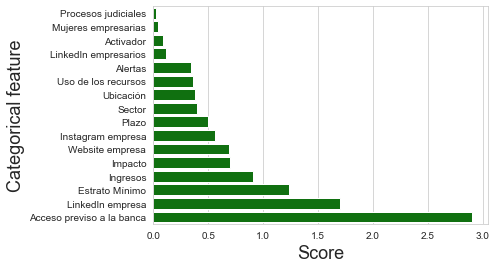

In [27]:
# plot the scores of features
datset1 = pd.DataFrame()
datset1['feature'] = X1.columns[ range(len(sf_fit1.scores_))]
datset1['scores'] = sf_fit1.scores_
datset1 = datset1.sort_values(by='scores', ascending=True)
sns.barplot(datset1['scores'], datset1['feature'], color='green')
sns.set_style('whitegrid')
plt.ylabel('Categorical feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [ ]:
X1 = data.drop('state', axis=1) # input features
y1 = data['state'] # target variable

In [ ]:
X1.info()

In [ ]:
# prepare input features
categorical = data.select_dtypes(include='object')
label_encoder = LabelEncoder()
categorical = label_encoder.fit(categorical)
#oe = LabelEncoder()
#X_enc = oe.fit_transform(X1.values)

# prepare target variable
le = LabelEncoder()
le.fit(y1)
y_enc = le.transform(y1)

In [ ]:
# feature selection
sf = SelectKBest(chi2, k='all')
sf_fit1 = sf.fit(X_enc, y_enc)
# print feature scores
for i in range(len(sf_fit1.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit1.scores_[i]))

In [ ]:
# plot the scores of features
datset1 = pd.DataFrame()
datset1['feature'] = X1.columns[ range(len(sf_fit1.scores_))]
datset1['scores'] = sf_fit1.scores_
datset1 = datset1.sort_values(by='scores', ascending=True)
sns.barplot(datset1['scores'], datset1['feature'], color='green')
sns.set_style('whitegrid')
plt.ylabel('Categorical feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()